<a href="https://colab.research.google.com/github/Giovannacm/nature-inspired-computing/blob/main/PSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

Disciplina: **Computação Inspirada pela Natureza** - Professor Fabricio Breve

**Trabalho 3** - Giovanna Carreira Marinho

Utilizar PSO - Particle Swarm Optimization para minimização da função f(x, y) = (1-x)² + 100(y-x²)² no intervalo [-5, 5], para x e y.

# Funções para o PSO

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [2]:
def avaliacao(f, ponto):
  f_ponto = f(ponto[0], ponto[1])
  return f_ponto

In [3]:
def geraPopulacao(tamanho, valor_min, valor_max, velocidade_min, velocidade_max, dimensao=2):
  populacao = []

  for i in range(tamanho):
    individuo = {}
    individuo['id'] = i

    if i == 0:
      individuo['viz'] = [tamanho - 1, i + 1]
    elif i == tamanho - 1:
      individuo['viz'] = [i - 1, 0]
    else:
      individuo['viz'] = [i - 1, i + 1]
      
    individuo['cord'] = np.random.randint(valor_min, valor_max + 1, size=dimensao)
    individuo['vel'] = np.random.uniform(velocidade_min, velocidade_max, size=dimensao)
    individuo['p'] = individuo['cord']

    populacao.append(individuo)

  return populacao

  '''populacao = [
    {'id': 0, 'viz': [1], 'cord': np.array([2, 1, 1]), 'vel': np.random.uniform(v_min, v_max, 3), 'p': np.array([2, 1, 1])},
    {'id': 1, 'viz': [0], 'cord': np.array([3, 7, 2]), 'vel': np.random.uniform(v_min, v_max, 3), 'p': np.array([3, 7, 2])}
  ]'''

In [4]:
def PSO(populacao, f, max_it, ac_1, ac_2, v_min, v_max, print_info=True, dimensao=2):
  t = 0
  historico = {'it': [], 'p_minimo': [], 'p_medio': []}

  while t < max_it:
    N = len(populacao)

    if print_info:
      print('-- Iteração', t, '--')

    p_geral = np.inf
    p_todos = []
    
    for i in range(N):
      #melhor desempenho do individuo
      f_xi = avaliacao(f, populacao[i]['cord'])
      f_pi = avaliacao(f, populacao[i]['p'])
      if f_xi < f_pi:
        populacao[i]['p'] = populacao[i]['cord']

      #melhor desempenho entre o individuo e vizinhos
      g = i
      for j in populacao[i]['viz']:
        f_pj = avaliacao(f, populacao[j]['p'])
        f_pg = avaliacao(f, populacao[g]['p'])
        if f_pj < f_pg:
          g = j

      #atualizacao da velocidade e posicao/coordenada do individuo
      const_1 = np.random.uniform(0, ac_1, size=dimensao)
      const_2 = np.random.uniform(0, ac_2, size=dimensao)
      
      v_i = populacao[i]['vel'] + const_1 * (populacao[i]['p'] - populacao[i]['cord']) + const_2 * (populacao[g]['p'] - populacao[i]['cord'])
      populacao[i]['vel'] = np.clip(v_i, v_min, v_max)
      populacao[i]['cord'] = populacao[i]['cord'] + populacao[i]['vel']

      if avaliacao(f, populacao[i]['p']) < p_geral:
        p_geral = avaliacao(f, populacao[i]['p'])
      p_todos.append(avaliacao(f, populacao[i]['p']))

      if print_info:
        print(populacao[i])
    
    historico['it'].append(t)
    historico['p_minimo'].append(p_geral)
    historico['p_medio'].append(np.mean(p_todos))

    t += 1

  return historico

In [5]:
f = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
v_min, v_max = (-2, 2)
ac_1 = ac_2 = 2.05

# Teste 1: 10 iterações

In [6]:
populacao_1 = geraPopulacao(tamanho=10, valor_min=-5, valor_max=5, velocidade_min=v_min, velocidade_max=v_max, dimensao=2)

In [7]:
historico_1 = PSO(populacao_1, f, 10, ac_1, ac_2, v_min, v_max, False)

In [8]:
populacao_2 = geraPopulacao(tamanho=30, valor_min=-5, valor_max=5, velocidade_min=v_min, velocidade_max=v_max, dimensao=2)

In [9]:
historico_2 = PSO(populacao_2, f, 10, ac_1, ac_2, v_min, v_max, False)

In [10]:
populacao_3 = geraPopulacao(tamanho=50, valor_min=-5, valor_max=5, velocidade_min=v_min, velocidade_max=v_max, dimensao=2)

In [11]:
historico_3 = PSO(populacao_3, f, 10, ac_1, ac_2, v_min, v_max, False)

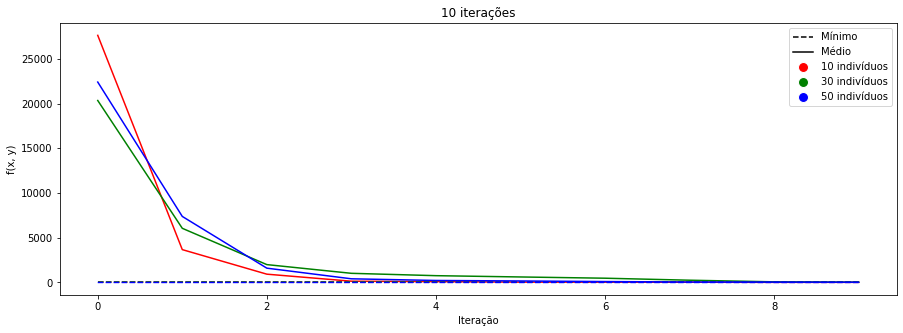

In [19]:
plt.figure(figsize=(15, 5))

plt.plot(historico_1['it'], historico_1['p_minimo'], color='r', linestyle='dashed')
plt.plot(historico_1['it'], historico_1['p_medio'], color='r', linestyle='solid')

plt.plot(historico_2['it'], historico_2['p_minimo'], color='g', linestyle='dashed')
plt.plot(historico_2['it'], historico_2['p_medio'], color='g', linestyle='solid')

plt.plot(historico_3['it'], historico_3['p_minimo'], color='b', linestyle='dashed')
plt.plot(historico_3['it'], historico_3['p_medio'], color='b', linestyle='solid')

legend_elements = [Line2D([0], [0], linestyle='dashed', color='black', label='Mínimo'),
                   Line2D([0], [0], linestyle='solid', color='black', label='Médio'),
                   Line2D([0], [0], marker='o', color='w', label='10 indivíduos', markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='30 indivíduos', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='50 indivíduos', markerfacecolor='b', markersize=10)]

plt.legend(handles=legend_elements)
plt.title('10 iterações')
plt.xlabel('Iteração')
plt.ylabel('f(x, y)')
plt.show()

# Teste 2: 30 iterações

In [28]:
populacao_1 = geraPopulacao(tamanho=10, valor_min=-5, valor_max=5, velocidade_min=v_min, velocidade_max=v_max, dimensao=2)
historico_1 = PSO(populacao_1, f, 30, ac_1, ac_2, v_min, v_max, False)

In [29]:
populacao_2 = geraPopulacao(tamanho=30, valor_min=-5, valor_max=5, velocidade_min=v_min, velocidade_max=v_max, dimensao=2)
historico_2 = PSO(populacao_2, f, 30, ac_1, ac_2, v_min, v_max, False)

In [30]:
populacao_3 = geraPopulacao(tamanho=50, valor_min=-5, valor_max=5, velocidade_min=v_min, velocidade_max=v_max, dimensao=2)
historico_3 = PSO(populacao_3, f, 30, ac_1, ac_2, v_min, v_max, False)

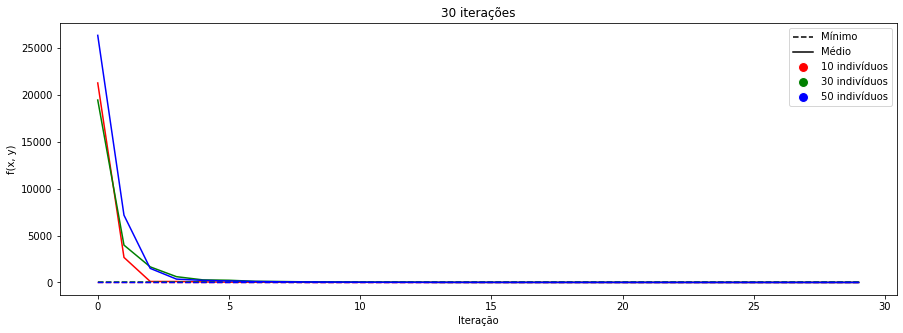

In [31]:
plt.figure(figsize=(15, 5))

plt.plot(historico_1['it'], historico_1['p_minimo'], color='r', linestyle='dashed')
plt.plot(historico_1['it'], historico_1['p_medio'], color='r', linestyle='solid')

plt.plot(historico_2['it'], historico_2['p_minimo'], color='g', linestyle='dashed')
plt.plot(historico_2['it'], historico_2['p_medio'], color='g', linestyle='solid')

plt.plot(historico_3['it'], historico_3['p_minimo'], color='b', linestyle='dashed')
plt.plot(historico_3['it'], historico_3['p_medio'], color='b', linestyle='solid')

legend_elements = [Line2D([0], [0], linestyle='dashed', color='black', label='Mínimo'),
                   Line2D([0], [0], linestyle='solid', color='black', label='Médio'),
                   Line2D([0], [0], marker='o', color='w', label='10 indivíduos', markerfacecolor='r', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='30 indivíduos', markerfacecolor='g', markersize=10),
                   Line2D([0], [0], marker='o', color='w', label='50 indivíduos', markerfacecolor='b', markersize=10)]

plt.legend(handles=legend_elements)
plt.title('30 iterações')
plt.xlabel('Iteração')
plt.ylabel('f(x, y)')
plt.show()